# Capstone 1: Chess

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
games = pd.read_csv('games.csv')

In [2]:
moves = games['moves']
match = moves.iloc[1]
match_list = np.array(match.split(' '))
match_array = match_list.reshape(-1,2)
rem_pieces = 32 - match.count('x')


In [3]:
def remaining_pieces(moves):
    '''
    Returns the number of pieces remaining on the board at the end of the match.
    Parameters
    ----------
    moves (string) = input move list

    Output
    ------
    number of remaining pieces (integer) 
    '''
    return 32 - moves.count('x')

In [4]:
games

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4


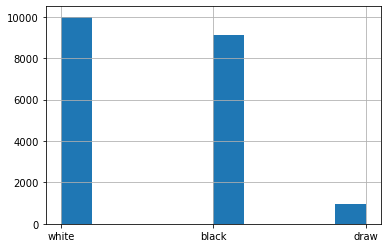

In [5]:
# scatter = games['turns','white_rating','black_rating','opening_ply']
# pd.plotting.scatter_matrix(scatter)
games['winner'].hist()

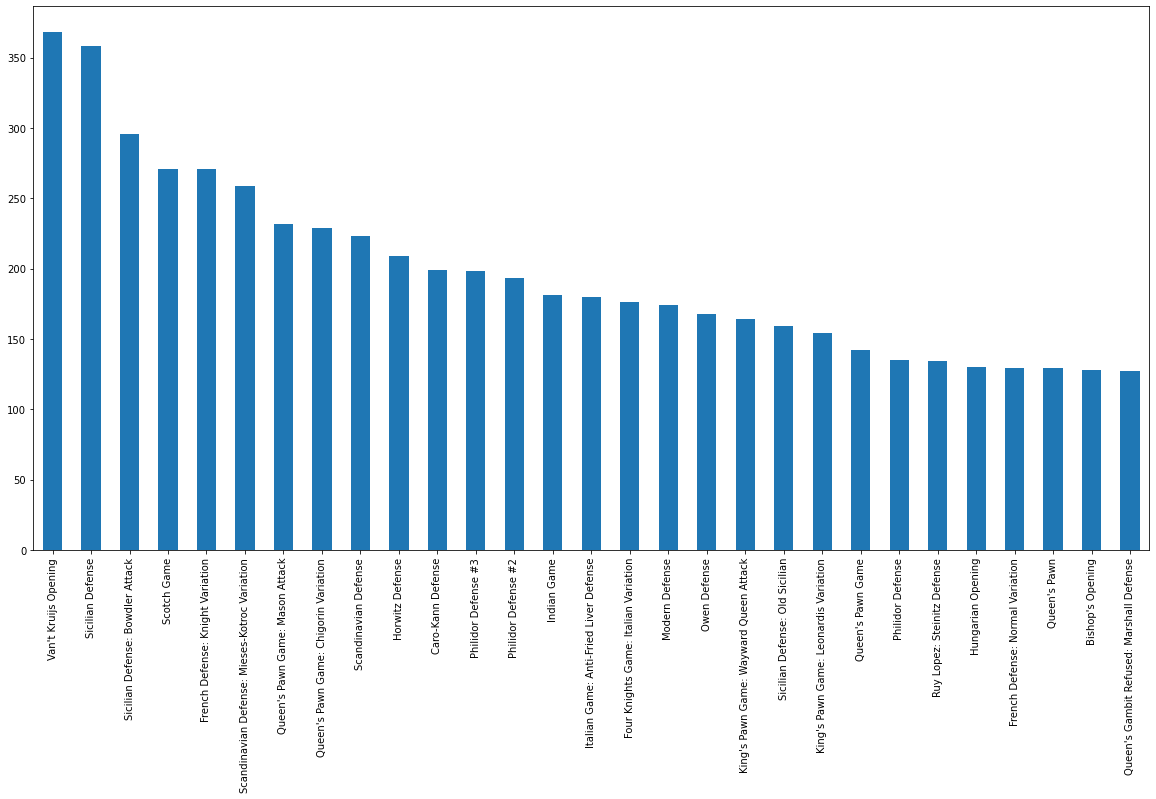

In [6]:
fig,ax = plt.subplots(figsize=(20,10))
ax = games['opening_name'].value_counts()[:29].plot.bar()

In [9]:
openings = games['opening_name'].value_counts()
vant = games[games['opening_name'] == openings.keys()[0]]
sicilian = games[games['opening_name'] == openings.keys()[1]]

In [18]:
bins = ['white','black','draw']
fig, ax = plt.subplots(4,5,figsize=(20,20))
ax = ax.flatten()
for i in range(20):
    ax[i].hist(games[games['opening_name'] == openings.keys()[i]]['winner'])
    ax[i].set_title(openings.keys()[i])

AttributeError: 'Rectangle' object has no property 'sort_columns'

Text(0.5, 1.0, 'Sicilian Defense: Bowdler Attack')

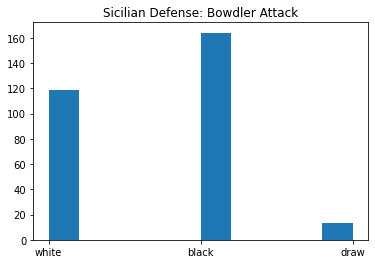

In [124]:
plt.hist(games[games['opening_name'] == openings.keys()[2]]['winner'])
plt.title(openings.keys()[2])

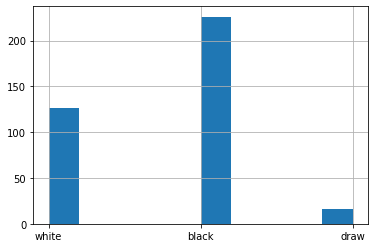

In [95]:
vant['winner'].hist()

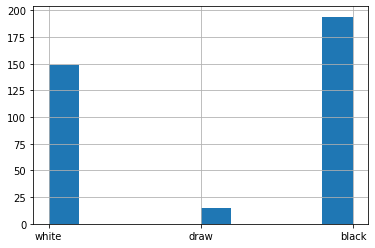

In [99]:
sicilian['winner'].hist()

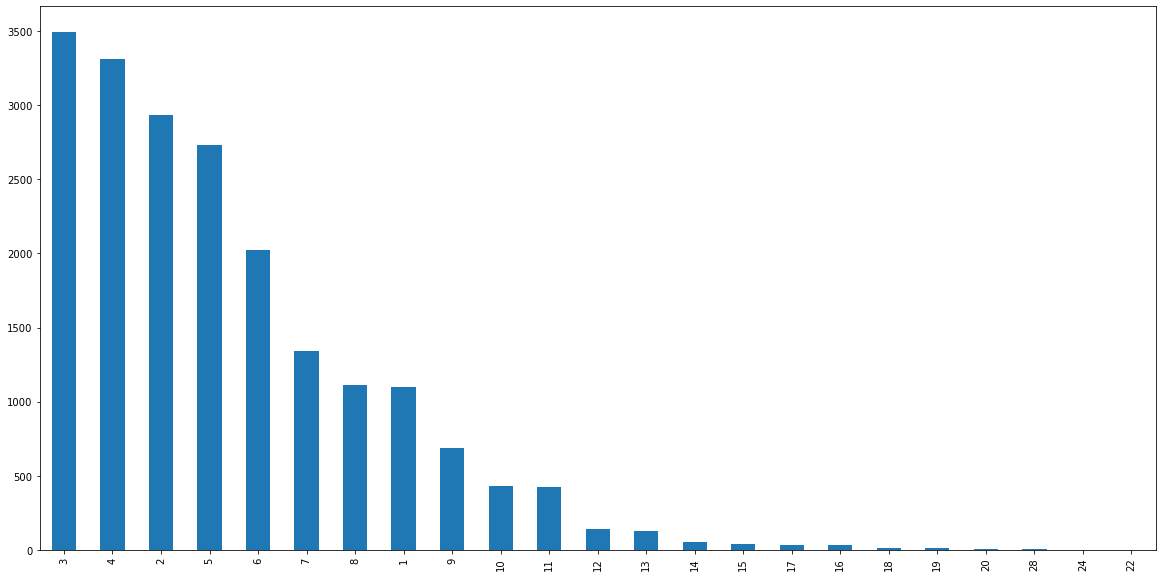

In [45]:
fig,ax = plt.subplots(figsize=(20,10))
ax = games['opening_ply'].value_counts()[:29].plot.bar()

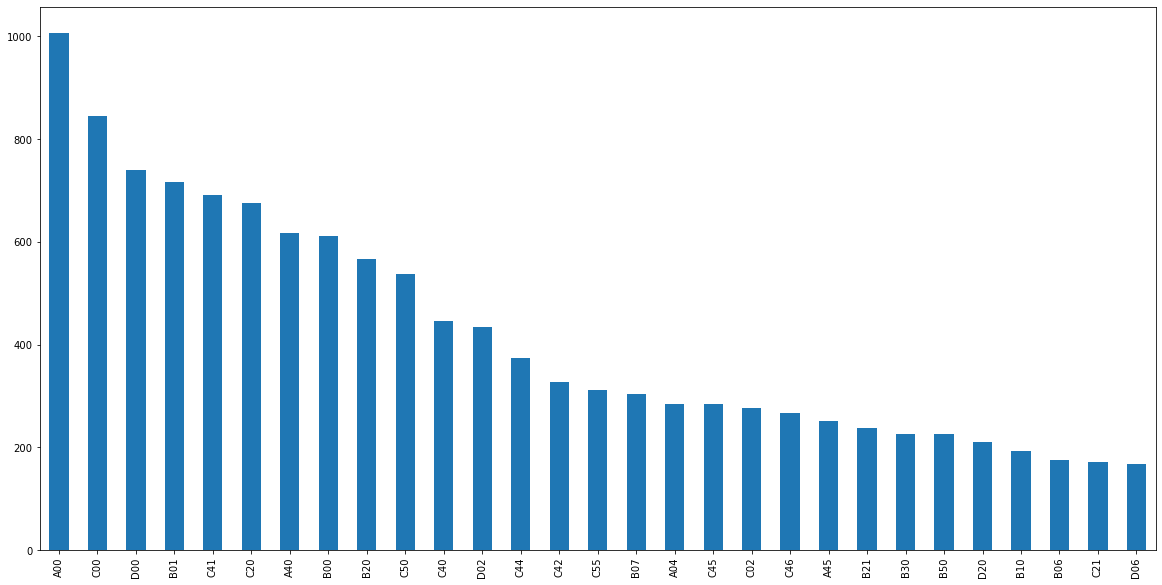

In [47]:
fig,ax = plt.subplots(figsize=(20,10))
ax = games['opening_eco'].value_counts()[:29].plot.bar()

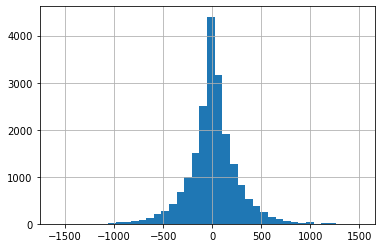

In [54]:
(games['white_rating']-games['black_rating']).hist(bins=40)

In [56]:
games['rating_differential']= games['white_rating']-games['black_rating']

In [16]:
games.groupby(['opening_name','winner']).count()

id  rated  created_at  last_move_at  \
opening_name                    winner                                        
Alekhine Defense                black   21     21          21            21   
                                draw     2      2           2             2   
                                white   23     23          23            23   
Alekhine Defense #2             black    1      1           1             1   
                                draw     1      1           1             1   
...                                     ..    ...         ...           ...   
Zukertort Opening: The Walrus   white    1      1           1             1   
Zukertort Opening: Vos Gambit   black    1      1           1             1   
                                draw     1      1           1             1   
                                white    1      1           1             1   
Zukertort Opening: Wade Defense black    1      1           1             1   

                                        turns  victory_status  increment_code  \
opening_name                    winner                                          
Alekhine Defense                black      21              21              21   
                                draw        2               2               2   
                                white      23              23              23   
Alekhine Defense #2             black       1               1               1   
                                draw        1               1               1   
...                                       ...             ...             ...   
Zukertort Opening: The Walrus   white       1               1               1   
Zukertort Opening: Vos Gambit   black       1               1               1   
                                draw        1               1               1   
                                white       1               1               1   
Zukertort Opening: Wade Defense black       1               1               1   

                                        white_id  white_rating  black_id  \
opening_name                    winner                                     
Alekhine Defense                black         21            21        21   
                                draw           2             2         2   
                                white         23            23        23   
Alekhine Defense #2             black          1             1         1   
                                draw           1             1         1   
...                                          ...           ...       ...   
Zukertort Opening: The Walrus   white          1             1         1   
Zukertort Opening: Vos Gambit   black          1             1         1   
                                draw           1             1         1   
                                white          1             1         1   
Zukertort Opening: Wade Defense black          1             1         1   

                                        black_rating  moves  opening_eco  \
opening_name                    winner                                     
Alekhine Defense                black             21     21           21   
                                draw               2      2            2   
                                white             23     23           23   
Alekhine Defense #2             black              1      1            1   
                                draw               1      1            1   
...                                              ...    ...          ...   
Zukertort Opening: The Walrus   white              1      1            1   
Zukertort Opening: Vos Gambit   black              1      1            1   
                                draw               1      1            1   
                                white              1      1            1   
Zukertort Opening: Wade Defense black              1     

In [69]:
draws = games[games['winner']=='draw']
draws[draws['rating_differential'] > 0].count()

id                     466
rated                  466
created_at             466
last_move_at           466
turns                  466
victory_status         466
winner                 466
increment_code         466
white_id               466
white_rating           466
black_id               466
black_rating           466
moves                  466
opening_eco            466
opening_name           466
opening_ply            466
rating_differential    466
dtype: int64

In [74]:
draws[draws['rating_differential'] == 0].count()

id                     13
rated                  13
created_at             13
last_move_at           13
turns                  13
victory_status         13
winner                 13
increment_code         13
white_id               13
white_rating           13
black_id               13
black_rating           13
moves                  13
opening_eco            13
opening_name           13
opening_ply            13
rating_differential    13
dtype: int64

In [81]:
openings_grp = games.groupby('opening_name')

array(['Slav Defense: Exchange Variation',
       'Nimzowitsch Defense: Kennedy Variation',
       "King's Pawn Game: Leonardis Variation", ...,
       "Queen's Indian Defense: Classical Variation |  Traditional Variation",
       "Queen's Gambit Declined: Slav |  Dutch Variation",
       'Sicilian Defense: Najdorf Variation |  Polugaevsky Variation'],
      dtype=object)